# Data Understanding

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
users = pd.read_csv("dataset/users.csv", index_col=0)

In [3]:
users.head()

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [4]:
users.shape

(11508, 5)

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [6]:
len(set(users.index))

11508

## Name

show the records with Null names

In [7]:
users[users.name.isna()]

,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


In [8]:
null_names_ids = users.name.isna()

## Lang

In [9]:
users.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [10]:
users.lang.value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [11]:
users.bot.unique()

array([1, 0])

In [12]:
users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

## Created_at

In [13]:
try:
    pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)


All the dates are ok!


In [14]:
users.created_at.min()

'2012-01-24 01:57:38'

In [15]:
users.created_at.max()

'2020-04-21 07:28:31'

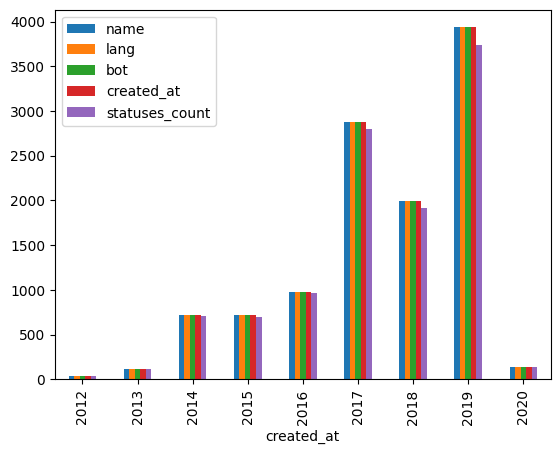

In [16]:
users.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.show()

## Statuses_count

In [17]:
null_statuses_count_ids = users.statuses_count.isna()

In [18]:
users.statuses_count[~null_statuses_count_ids].describe()

count     11109.000000
mean       5883.312359
std       19073.007305
min           0.000000
25%          41.000000
50%          68.000000
75%        2916.000000
max      399555.000000
Name: statuses_count, dtype: float64

In [19]:
users[users.bot == 0].statuses_count[~null_statuses_count_ids].describe()

count      4993.000000
mean      11638.219107
std       26719.438432
min           0.000000
25%          61.000000
50%        2041.000000
75%       11585.000000
max      399555.000000
Name: statuses_count, dtype: float64

In [20]:
users[users.bot == 1].statuses_count[~null_statuses_count_ids].describe()

count      6116.000000
mean       1185.102845
std        5373.550630
min           0.000000
25%          32.000000
50%          53.000000
75%          78.000000
max      214410.000000
Name: statuses_count, dtype: float64

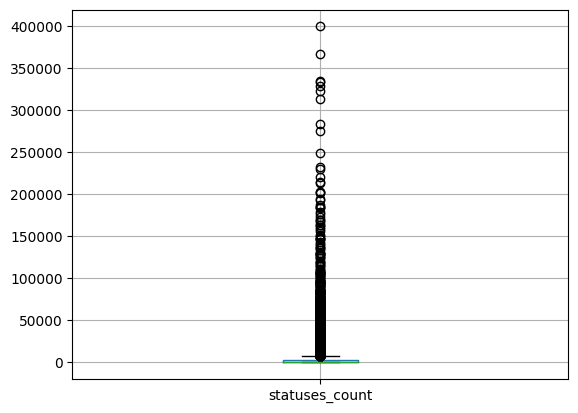

In [21]:
pd.DataFrame(users.statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

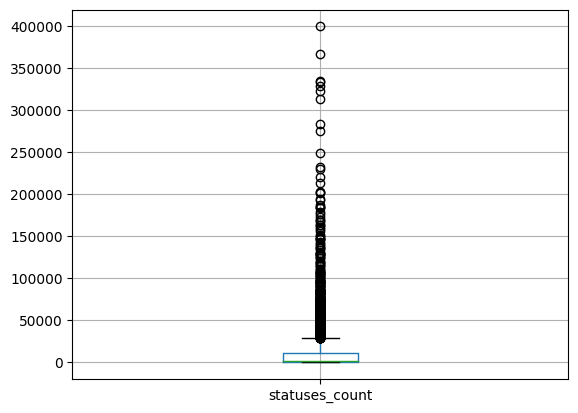

In [22]:
pd.DataFrame(users[users.bot == 0].statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

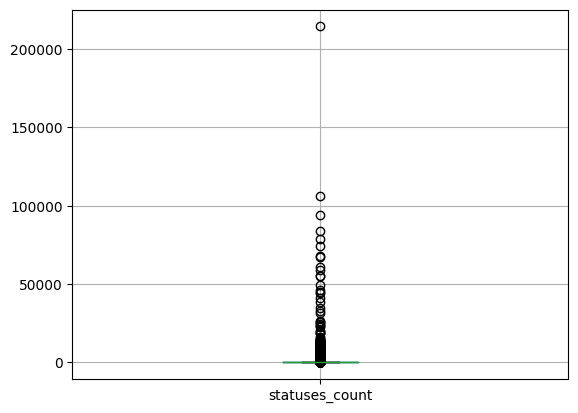

In [23]:
pd.DataFrame(users[users.bot == 1].statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

## Tweets

In [24]:
tweets = pd.read_csv("dataset/tweets.csv", index_col=0)

In [25]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [26]:
tweets.shape

(13664696, 9)

In [43]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.3+ GB


## User_id

In [27]:
tweets.user_id.value_counts()

497404180     4600
7004532       4580
157029836     4578
1693274954    4572
491630583     4570
              ... 
9a8wb95x4        1
ql8aw            1
40rcr            1
syeybyw2um       1
tzn9s6bwj        1
Name: user_id, Length: 222285, dtype: int64

In [33]:
unique_user_id = tweets.user_id.unique()
print(len(unique_user_id))

222286


In [36]:
# vettorializzare, capire come rendere più veloce

def is_natural(x):
    # return true if x is a natural number
    if np.isreal(x):
        return x == np.floor(x)
    else:
        return False

In [47]:
numeric_user_id = pd.to_numeric(tweets.user_id, errors='coerce')

In [52]:
nan_ids_user_id = numeric_user_id.isna()

In [53]:
print(f"non numerical ids {np.sum(nan_ids_user_id)}")

non numerical ids 433895


In [68]:
value_counts_number_user_id = tweets.user_id[~nan_ids_user_id].value_counts()
print(value_counts_number_user_id)

497404180     4600
7004532       4580
157029836     4578
1693274954    4572
491630583     4570
              ... 
790              1
937              1
648              1
0e1              1
261              1
Name: user_id, Length: 12273, dtype: int64


In [61]:
# notiamo che alcuni user_id sono ambigui ("0e1"),
# in una seconda fase, quando andremo a fare un join tra la
# tabella dei tweets e la tabella degli utenti andremo ad eliminare i valori che non hanno un corrispettivo id
# nella tabella degli utenti.

## Retweet_count

In [83]:
numeric_retweet_count = pd.to_numeric(tweets.retweet_count, errors="coerce")

In [88]:
na_ids_retweet_count = numeric_retweet_count.isna()
inf_ids_retweet_count = numeric_retweet_count.apply(np.isinf)

In [89]:
print(np.sum(na_ids_retweet_count))
print(np.sum(inf_ids_retweet_count))

625456
1


In [99]:
numeric_retweet_count[~np.logical_or(na_ids_retweet_count, inf_ids_retweet_count)].describe()

count     1.303924e+07
mean     1.533832e+127
std      5.538649e+130
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       1.000000e+00
max      2.000000e+134
Name: retweet_count, dtype: float64

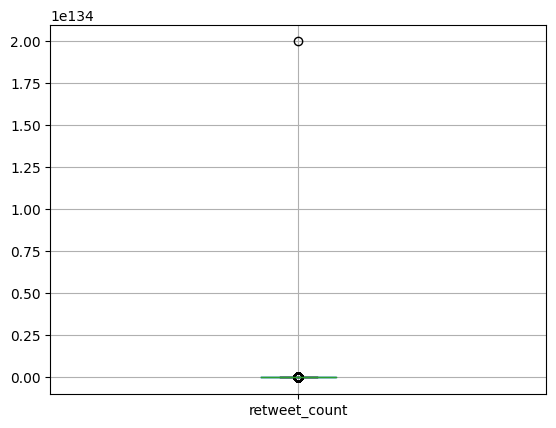

In [102]:
pd.DataFrame(numeric_retweet_count[~np.logical_or(na_ids_retweet_count, inf_ids_retweet_count)]).boxplot()
plt.show()

## reply count

In [105]:
numeric_reply_count = pd.to_numeric(tweets.reply_count, errors="coerce")

In [106]:
na_ids_reply_count = numeric_reply_count.isna()
inf_ids_reply_count = numeric_reply_count.apply(np.isinf)

In [108]:
print(np.sum(na_ids_reply_count))
print(np.sum(inf_ids_reply_count))

809504
1


In [109]:
numeric_reply_count[~np.logical_or(na_ids_reply_count, inf_ids_reply_count)].describe()

count     1.285519e+07
mean     1.555792e+103
std      5.578157e+106
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      2.000000e+110
Name: reply_count, dtype: float64

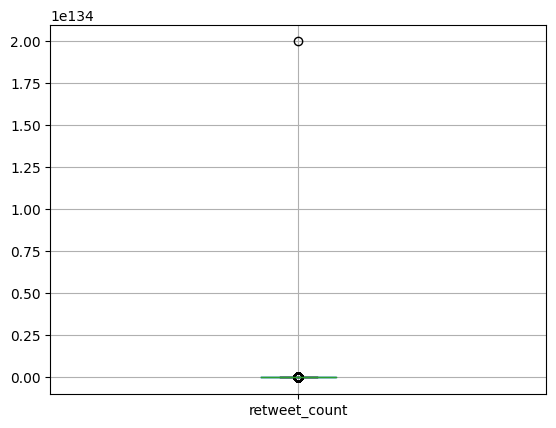

In [110]:
pd.DataFrame(numeric_retweet_count[~np.logical_or(na_ids_retweet_count, inf_ids_retweet_count)]).boxplot()
plt.show()

## Favorite count

In [111]:
numeric_favorite_count = pd.to_numeric(tweets.favorite_count, errors="coerce")

In [116]:
na_ids_favorite_count = numeric_favorite_count.isna()
inf_ids_favorite_count = numeric_favorite_count.apply(np.isinf)
negative_ids_favotite_count = numeric_favorite_count.apply(lambda x: x<0)

In [117]:
print(np.sum(na_ids_favorite_count))
print(np.sum(inf_ids_favorite_count))
print(np.sum(negative_ids_favotite_count))

808097
0
1


In [118]:
numeric_favorite_count[~np.logical_or(na_ids_favorite_count, inf_ids_favorite_count, negative_ids_favotite_count)].describe()

count     1.285660e+07
mean     5.444675e+204
std                inf
min      -1.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      7.000000e+211
Name: favorite_count, dtype: float64

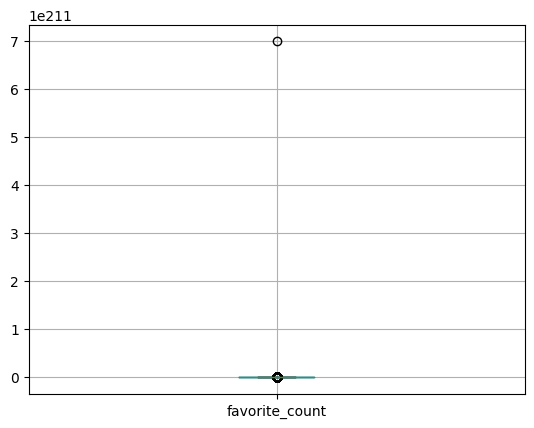

In [119]:
pd.DataFrame(numeric_favorite_count[~np.logical_or(na_ids_favorite_count, inf_ids_favorite_count, negative_ids_favotite_count)]).boxplot()
plt.show()

## num hashtags

In [123]:
numeric_num_hashtags = pd.to_numeric(tweets.num_hashtags, errors="coerce")

In [124]:
na_ids_num_hashtags = numeric_num_hashtags.isna()
inf_ids_num_hashtags = numeric_num_hashtags.apply(np.isinf)
negative_ids_num_hashtags = numeric_num_hashtags.apply(lambda x: x<0)

In [126]:
print(np.sum(na_ids_num_hashtags))
print(np.sum(inf_ids_num_hashtags))
print(np.sum(negative_ids_num_hashtags))

1163677
0
0


In [127]:
numeric_num_hashtags[~np.logical_or(na_ids_num_hashtags, inf_ids_num_hashtags, negative_ids_num_hashtags)].describe()

count     1.250102e+07
mean     5.599544e+146
std      1.979818e+150
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      7.000000e+153
Name: num_hashtags, dtype: float64

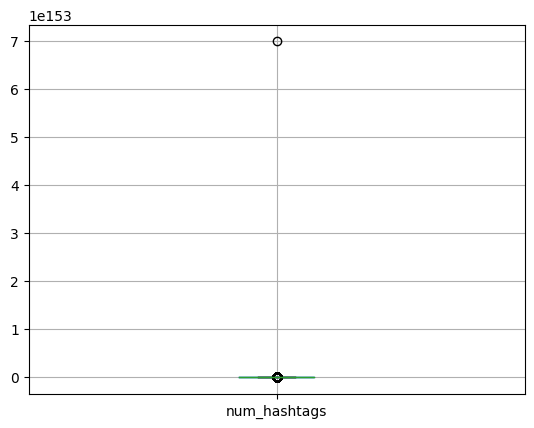

In [133]:
pd.DataFrame(numeric_num_hashtags[~np.logical_or(na_ids_num_hashtags, inf_ids_num_hashtags, negative_ids_num_hashtags)]).boxplot()
plt.show()

## Num urls

In [131]:
numeric_num_urls = pd.to_numeric(tweets.num_urls, errors="coerce")

In [141]:
na_ids_num_urls = numeric_num_urls.isna()
inf_ids_num_urls = numeric_num_urls.apply(np.isinf)
negative_ids_num_urls = numeric_num_urls.apply(lambda x: x<0)

In [142]:
print(np.sum(na_ids_num_urls))
print(np.sum(inf_ids_num_urls))
print(np.sum(negative_ids_num_urls))

808953
0
0


In [143]:
numeric_num_urls[~np.logical_or(na_ids_num_urls, inf_ids_num_urls, negative_ids_num_urls)].describe()

count     1.285574e+07
mean     7.778625e+202
std                inf
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      1.000000e+210
Name: num_urls, dtype: float64

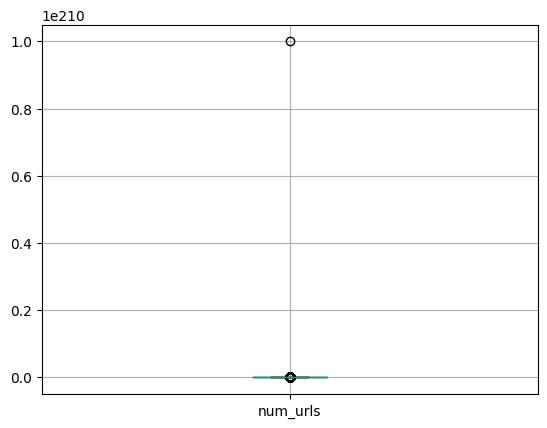

In [144]:
pd.DataFrame(numeric_num_urls[~np.logical_or(na_ids_num_urls, inf_ids_num_urls, negative_ids_num_urls)]).boxplot()
plt.show()

## Num mentions

In [145]:
numeric_num_mentions = pd.to_numeric(tweets.num_mentions, errors="coerce")

In [146]:
na_ids_num_mentions = numeric_num_mentions.isna()
inf_ids_num_mentions = numeric_num_mentions.apply(np.isinf)
negative_ids_num_mentions = numeric_num_mentions.apply(lambda x: x<0)

In [147]:
print(np.sum(na_ids_num_mentions))
print(np.sum(inf_ids_num_mentions))
print(np.sum(negative_ids_num_mentions))

987990
0
0


In [148]:
numeric_num_mentions[~np.logical_or(na_ids_num_mentions, inf_ids_num_mentions, negative_ids_num_mentions)].describe()

count    1.267671e+07
mean     4.733091e+90
std      1.685187e+94
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.000000e+97
Name: num_mentions, dtype: float64

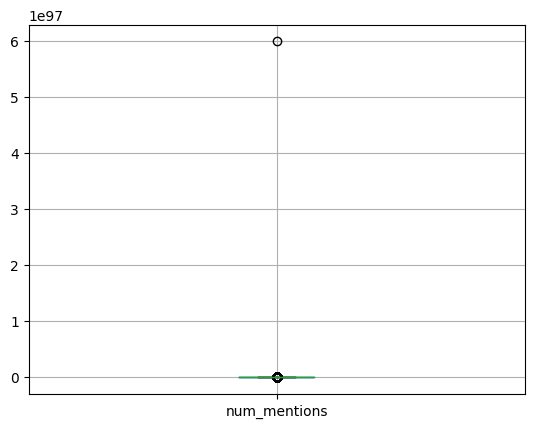

In [149]:
pd.DataFrame(numeric_num_mentions[~np.logical_or(na_ids_num_mentions, inf_ids_num_mentions, negative_ids_num_mentions)]).boxplot()
plt.show()

## numerical correlations

In [150]:
numerical_cols = ["retweet_count", "reply_count", "favorite_count", "num_hashtags", "num_urls", "num_mentions"]

In [154]:
sub_numerical_tweets = tweets[numerical_cols]

In [159]:
# pulire prima i dati!!!

sub_numerical_tweets.sample(10000).corr()

/var/folders/h6/9j84q4q56zd3nyy8fl00jw0w0000gn/T/ipykernel_9919/1528693957.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_numerical_tweets.sample(10000).corr()


""


## Created at

In [160]:
try:
    pd.to_datetime(tweets.created_at, format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)

All the dates are ok!


In [161]:
# prima della creazione di tweetter
tweets.created_at.min()

'1953-04-17 12:24:33'

In [162]:
# nel futuro
tweets.created_at.max()

'2040-04-27 11:03:25'